In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [4]:
(x_img_train, y_label_train),(x_img_test, y_label_test)=cifar10.load_data()

In [6]:
print("train data:", 'images:', x_img_train.shape, " labels:", y_label_train.shape)
print("test data", 'images: ', x_img_test.shape, " labels:", y_label_test.shape)

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test data images:  (10000, 32, 32, 3)  labels: (10000, 1)


In [35]:
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0

In [9]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [49]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))

In [50]:
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

In [51]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [52]:
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu', padding='same'))

In [53]:
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))

In [55]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [56]:
model.add(Flatten())

In [57]:
model.add(Dropout(0.3))

In [19]:
model.add(Dense(2500,  activation='relu'))

In [58]:
model.add(Dropout(rate=0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))

In [59]:
model.add(Dense(10, activation='softmax'))

In [22]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [60]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=50, batch_size=300, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 343s 9ms/step - loss: 1.9765 - acc: 0.2587 - val_loss: 1.7670 - val_acc: 0.3615
Epoch 2/50
40000/40000 [==============================] - 342s 9ms/step - loss: 1.5601 - acc: 0.4188 - val_loss: 1.5146 - val_acc: 0.4508
Epoch 3/50
40000/40000 [==============================] - 330s 8ms/step - loss: 1.3656 - acc: 0.4994 - val_loss: 1.2287 - val_acc: 0.5569
Epoch 4/50
40000/40000 [==============================] - 326s 8ms/step - loss: 1.2298 - acc: 0.5550 - val_loss: 1.1518 - val_acc: 0.5865
Epoch 5/50
40000/40000 [==============================] - 328s 8ms/step - loss: 1.1229 - acc: 0.5965 - val_loss: 1.0830 - val_acc: 0.6119
Epoch 6/50
40000/40000 [==============================] - 332s 8ms/step - loss: 1.0433 - acc: 0.6313 - val_loss: 1.0293 - val_acc: 0.6446
Epoch 7/50
40000/40000 [==============================] - 341s 9ms/step - loss: 0.9852 - acc: 0.6514 - val_loss: 0.9427 - 

In [25]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx], cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title += '=>'+label_dict[prediction[i]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

In [27]:
label_dict={0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"trunk"}

In [28]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

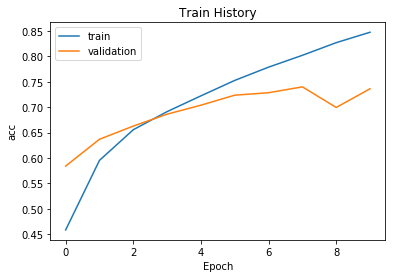

In [30]:
model.save_weights(cifarCnnModel.h5)
show_train_history(train_history, 'acc', 'val_acc')

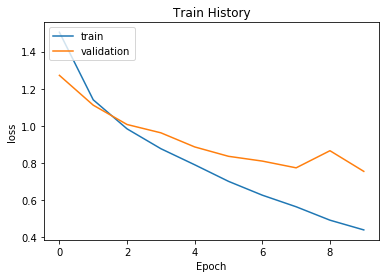

In [31]:
show_train_history(train_history, 'loss', 'val_loss')

In [36]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=0)

In [37]:
scores[1]

0.734

In [38]:
prediction = model.predict_classes(x_img_test_normalize)

In [39]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

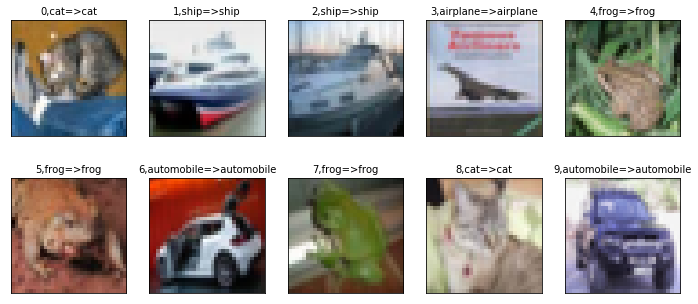

In [40]:
plot_images_labels_prediction(x_img_test, y_label_test, prediction, 0, 10)

In [41]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [42]:
def show_Predicted_Probability(y, prediction, x_img, Predicted_Probability, i):
    print('label:', label_dict[y[i][0]], 'predict', label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability: %1.9f'%(Predicted_Probability[i][j]))

label: cat predict cat


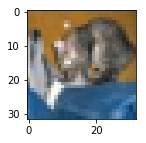

airplane Probability: 0.007213318
automobile Probability: 0.006730307
bird Probability: 0.009404926
cat Probability: 0.590834677
deer Probability: 0.003309022
dog Probability: 0.315733463
frog Probability: 0.031798709
horse Probability: 0.003479582
ship Probability: 0.029589778
trunk Probability: 0.001906249


In [43]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability, 0)

label: airplane predict airplane


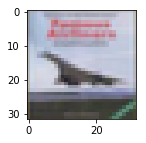

airplane Probability: 0.747495890
automobile Probability: 0.001505030
bird Probability: 0.012037883
cat Probability: 0.000925234
deer Probability: 0.005451246
dog Probability: 0.000052195
frog Probability: 0.000077944
horse Probability: 0.000023802
ship Probability: 0.232087225
trunk Probability: 0.000343664


In [44]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability, 3)

In [45]:
prediction.shape

(10000,)

In [46]:
y_label_test.shape

(10000, 1)

In [47]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [48]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction, rownames=['label'], colnames=['prediction'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'trunk'}


prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,791,9,57,14,15,9,12,3,70,20
1,20,833,17,15,3,9,16,3,32,52
2,54,1,663,38,72,65,79,14,12,2
3,25,8,96,495,42,192,107,20,10,5
4,20,2,98,47,686,37,79,17,13,1
5,11,0,60,139,37,671,46,27,5,4
6,6,5,40,37,13,17,876,2,3,1
7,11,1,49,37,74,87,11,719,5,6
8,43,25,20,13,6,6,13,1,863,10
